In [1]:
from datetime import datetime
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


nifty_data = pd.read_csv('../ml-project-data/NIFTY-50/2014.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)

nifty_data = nifty_data.drop(['Open', 'High', 'Low', 'Close'], axis=1)

y_lag = pd.DataFrame()
for i in range(5,0,-1):
    y_lag['t-'+str(i)] = nifty_data['Average'].shift(i)
y_lag['t'] = nifty_data['Average'].values
y = y_lag

nifty_data = pd.concat([nifty_data,y], axis = 1)
nifty_data = nifty_data.drop(['t'], axis = 1)

nifty_data = nifty_data.iloc[5:]

In [28]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


nifty_data_test = pd.read_csv('../ml-project-data/NIFTY-50/2015.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data_test['Average'] = nifty_data_test.loc[: , "High":"Low"].mean(axis=1)

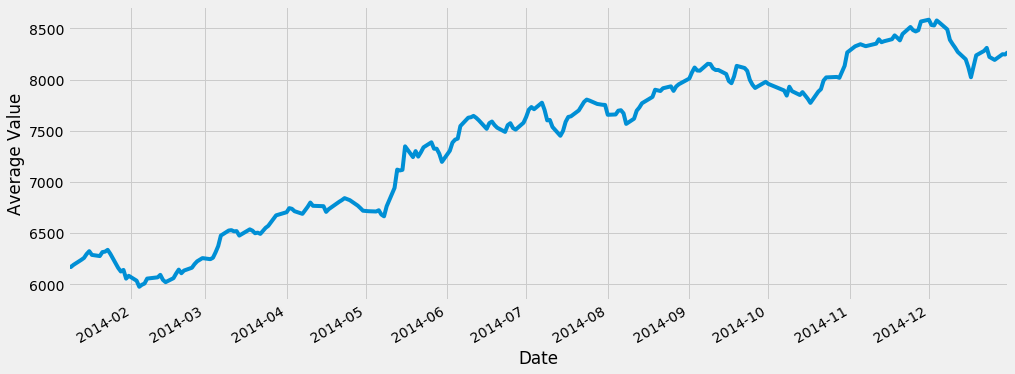

In [29]:
nifty_data['Average'].plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [30]:
model = VAR(endog=nifty_data)

model = model.fit()

In [36]:
prediction = model.forecast(model.y, steps=int(len(nifty_data)))

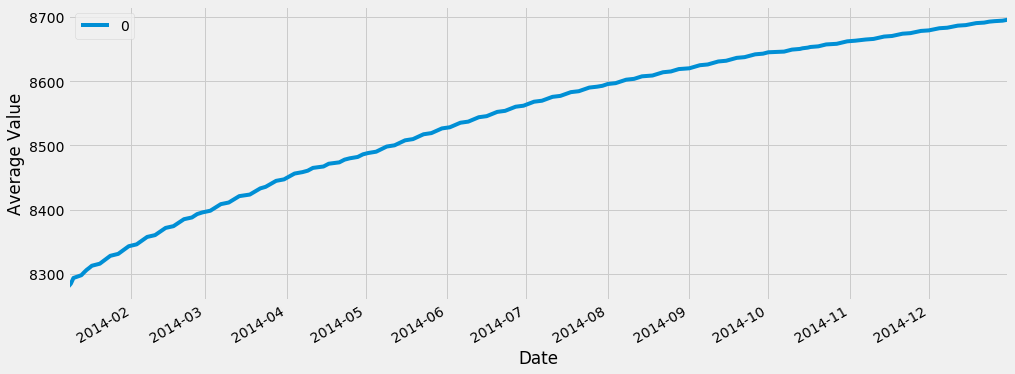

In [40]:
pd.DataFrame(prediction[:,2], index = nifty_data['Average'].index).plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

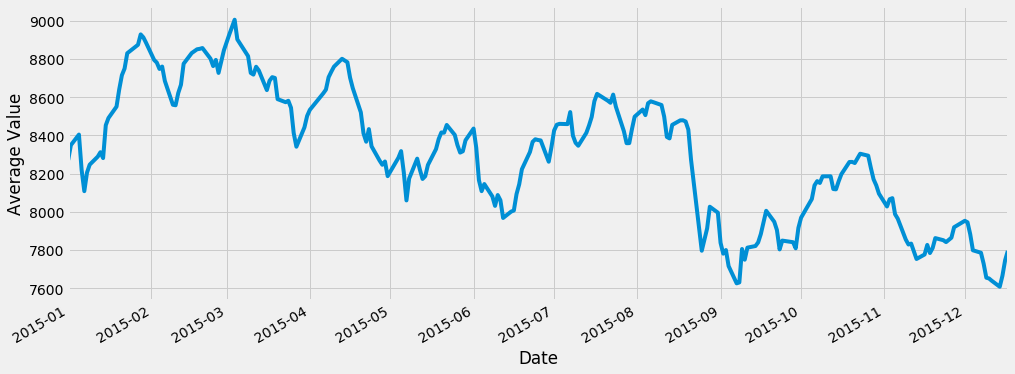

In [41]:
nifty_data_test['Average'][:len(prediction)].plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [65]:
print('RMSE: ', np.sqrt(mean_squared_error(prediction[:,2], nifty_data_test['Average'][:len(prediction[:,2])])))

print('MAPE: ', np.mean(np.abs((nifty_data_test['Average'][:len(prediction[:,2])] - prediction[:,2]) / nifty_data_test['Average'][:len(prediction[:,2])])) * 100)

RMSE:  493.484421026
MAPE:  4.956234120203115


In [47]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


TCS_data = pd.read_csv('../ml-project-data/TCS/01-01-2014-TO-31-12-2014TCSEQN.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)

TCS_data = TCS_data.drop(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Close Price'], axis=1)

y_lag = pd.DataFrame()
for i in range(5,0,-1):
    y_lag['t-'+str(i)] = TCS_data['Average Price'].shift(i)
y_lag['t'] = TCS_data['Average Price'].values
y = y_lag

TCS_data = pd.concat([TCS_data,y], axis = 1)
TCS_data = TCS_data.drop(['t'], axis = 1)

TCS_data = TCS_data.iloc[5:]

In [45]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


TCS_data_test = pd.read_csv('../ml-project-data/TCS/01-01-2015-TO-31-12-2015TCSEQN.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)

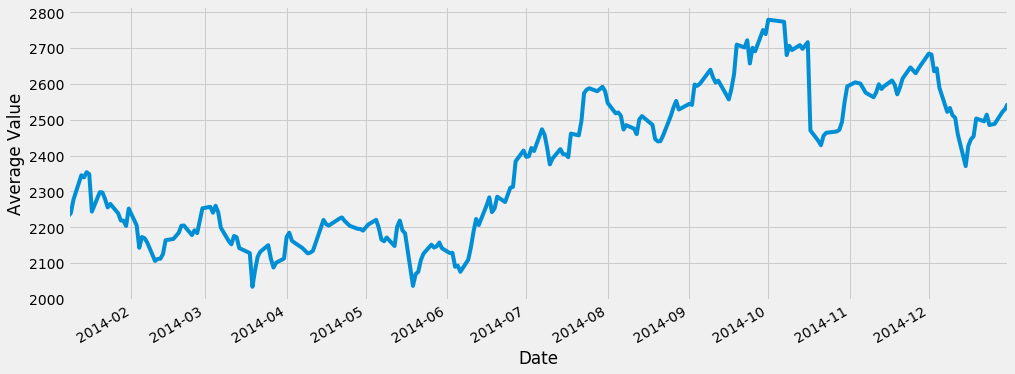

In [49]:
TCS_data['Average Price'].plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [55]:
model_TCS = VAR(endog=TCS_data)
#model_TCS = VAR(endog=TCS_data, exog=nifty_data)

model_TCS = model_TCS.fit()

In [56]:
prediction_TCS = model_TCS.forecast(model_TCS.y, steps=int(len(TCS_data)))

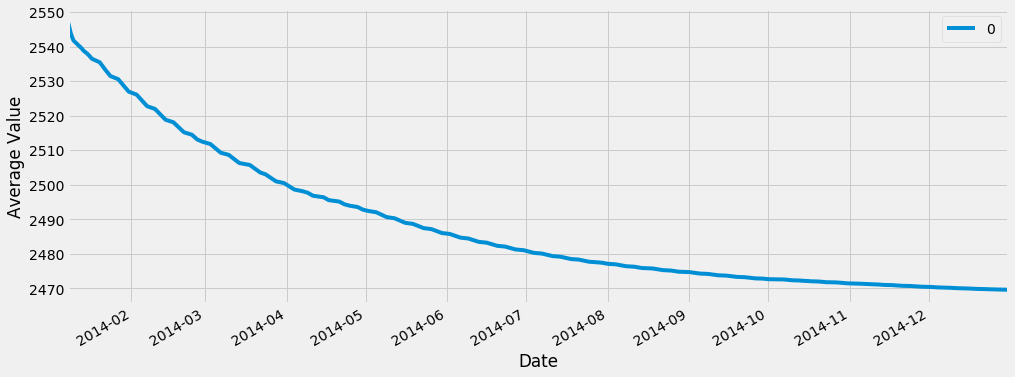

In [59]:
pd.DataFrame(prediction_TCS[:,0], index = TCS_data['Average Price'].index).plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

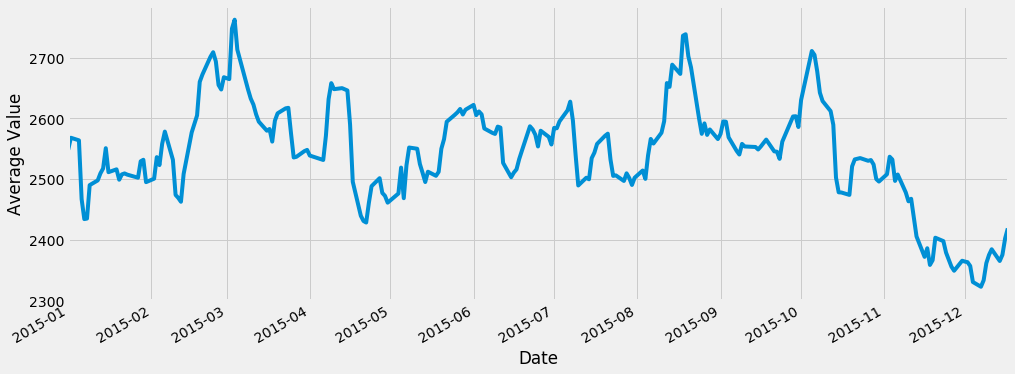

In [61]:
TCS_data_test['Average Price'][:len(prediction_TCS)].plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [67]:
print('RMSE: ', np.sqrt(mean_squared_error(prediction_TCS[:,0], TCS_data_test['Average Price'][:len(prediction_TCS[:,0])])))

print('MAPE: ', np.mean(np.abs((TCS_data_test['Average Price'][:len(prediction_TCS[:,2])] - prediction_TCS[:,0]) / TCS_data_test['Average Price'][:len(prediction_TCS[:,0])])) * 100)

RMSE:  100.590592073
MAPE:  3.2300099347966134
